In [23]:
pip install pandas matplotlib seaborn

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unique dataset by combining two datasets
Unique_Dataset = pd.read_csv('Psychological Health and Stability.csv')

<ipython-input-35-f5ddbb7bc267>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  point_plot = sns.pointplot(data=mental_health_data_melted, x='Year', y='Percentage', hue='Disorder', dodge=True, ci=None)


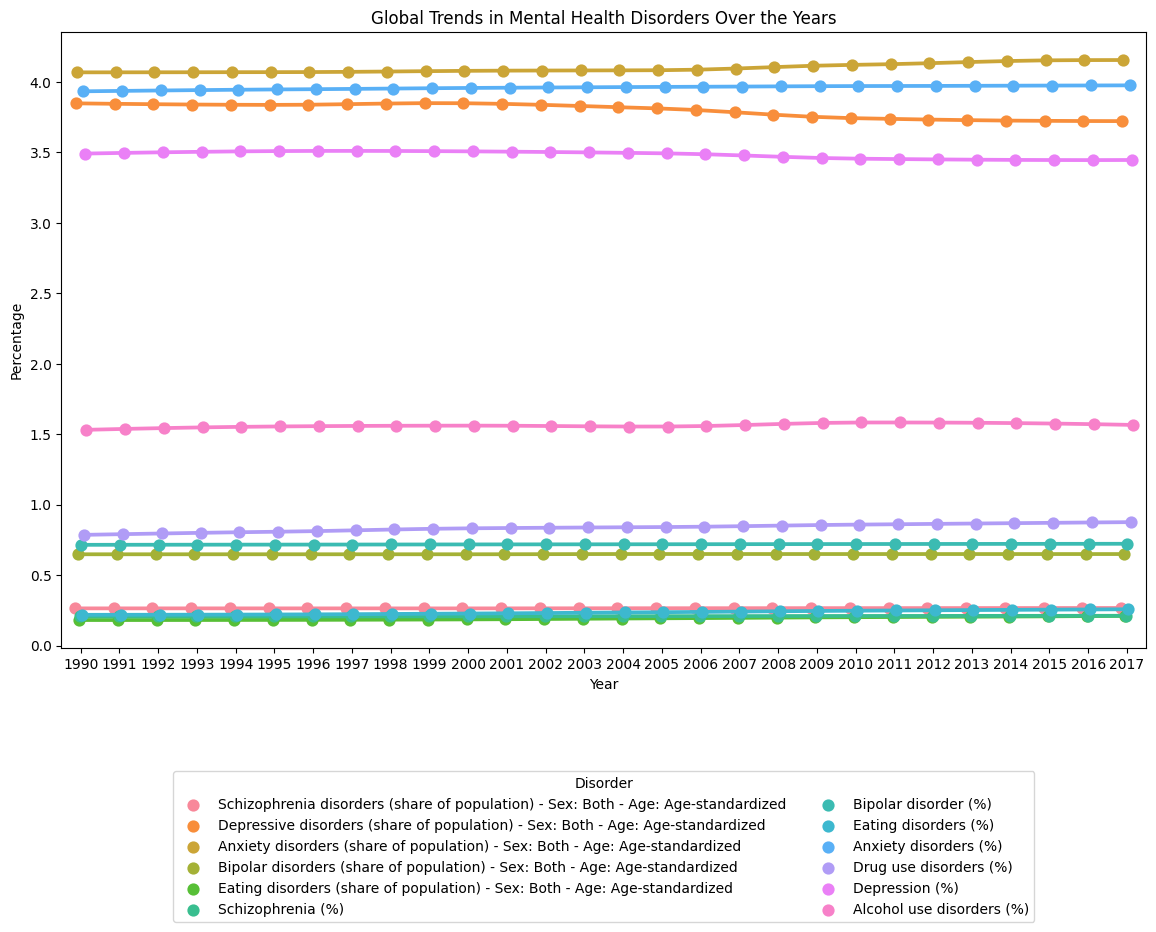

In [35]:

# List of mental health disorder columns
mental_health_columns = [
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Schizophrenia (%)',
    'Bipolar disorder (%)',
    'Eating disorders (%)',
    'Anxiety disorders (%)',
    'Drug use disorders (%)',
    'Depression (%)',
    'Alcohol use disorders (%)'
]

# Create a new DataFrame with only the mental health columns
mental_health_data = Unique_Dataset[['Entity', 'Year'] + mental_health_columns]

# Melt the DataFrame to make it suitable for seaborn's pointplot
mental_health_data_melted = mental_health_data.melt(id_vars=['Entity', 'Year'], var_name='Disorder', value_name='Percentage')

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a pointplot to visualize the trends
point_plot = sns.pointplot(data=mental_health_data_melted, x='Year', y='Percentage', hue='Disorder', dodge=True, ci=None)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Global Trends in Mental Health Disorders Over the Years')

# Adjust legend placement and orientation
point_plot.legend(title='Disorder', bbox_to_anchor=(0.5, -0.2), loc='upper center', borderaxespad=0., ncol=2)

# Show the plot
plt.show()


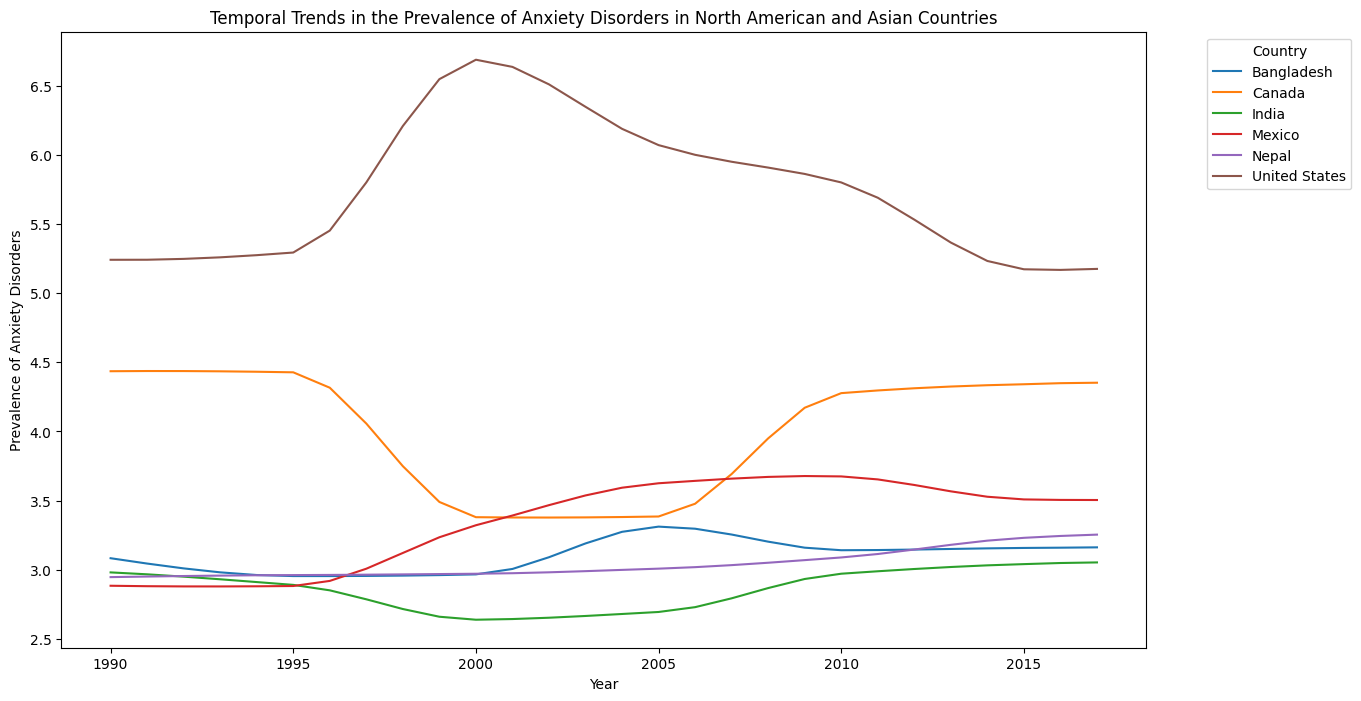

In [39]:
# Extract relevant columns for anxiety and year
anxiety_data = Unique_Dataset[['Entity', 'Year', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Filter the data for the United States and Bangladesh
selected_countries = ['United States', 'Mexico', 'Canada', 'Bangladesh', 'India', 'Nepal']
anxiety_data_selected = anxiety_data[anxiety_data['Entity'].isin(selected_countries)]

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a lineplot to visualize temporal trends for anxiety in the United States and Bangladesh
sns.lineplot(data=anxiety_data_selected, x='Year', y='Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', hue='Entity')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Prevalence of Anxiety Disorders')
plt.title('Temporal Trends in the Prevalence of Anxiety Disorders in North American and Asian Countries')

# Show legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


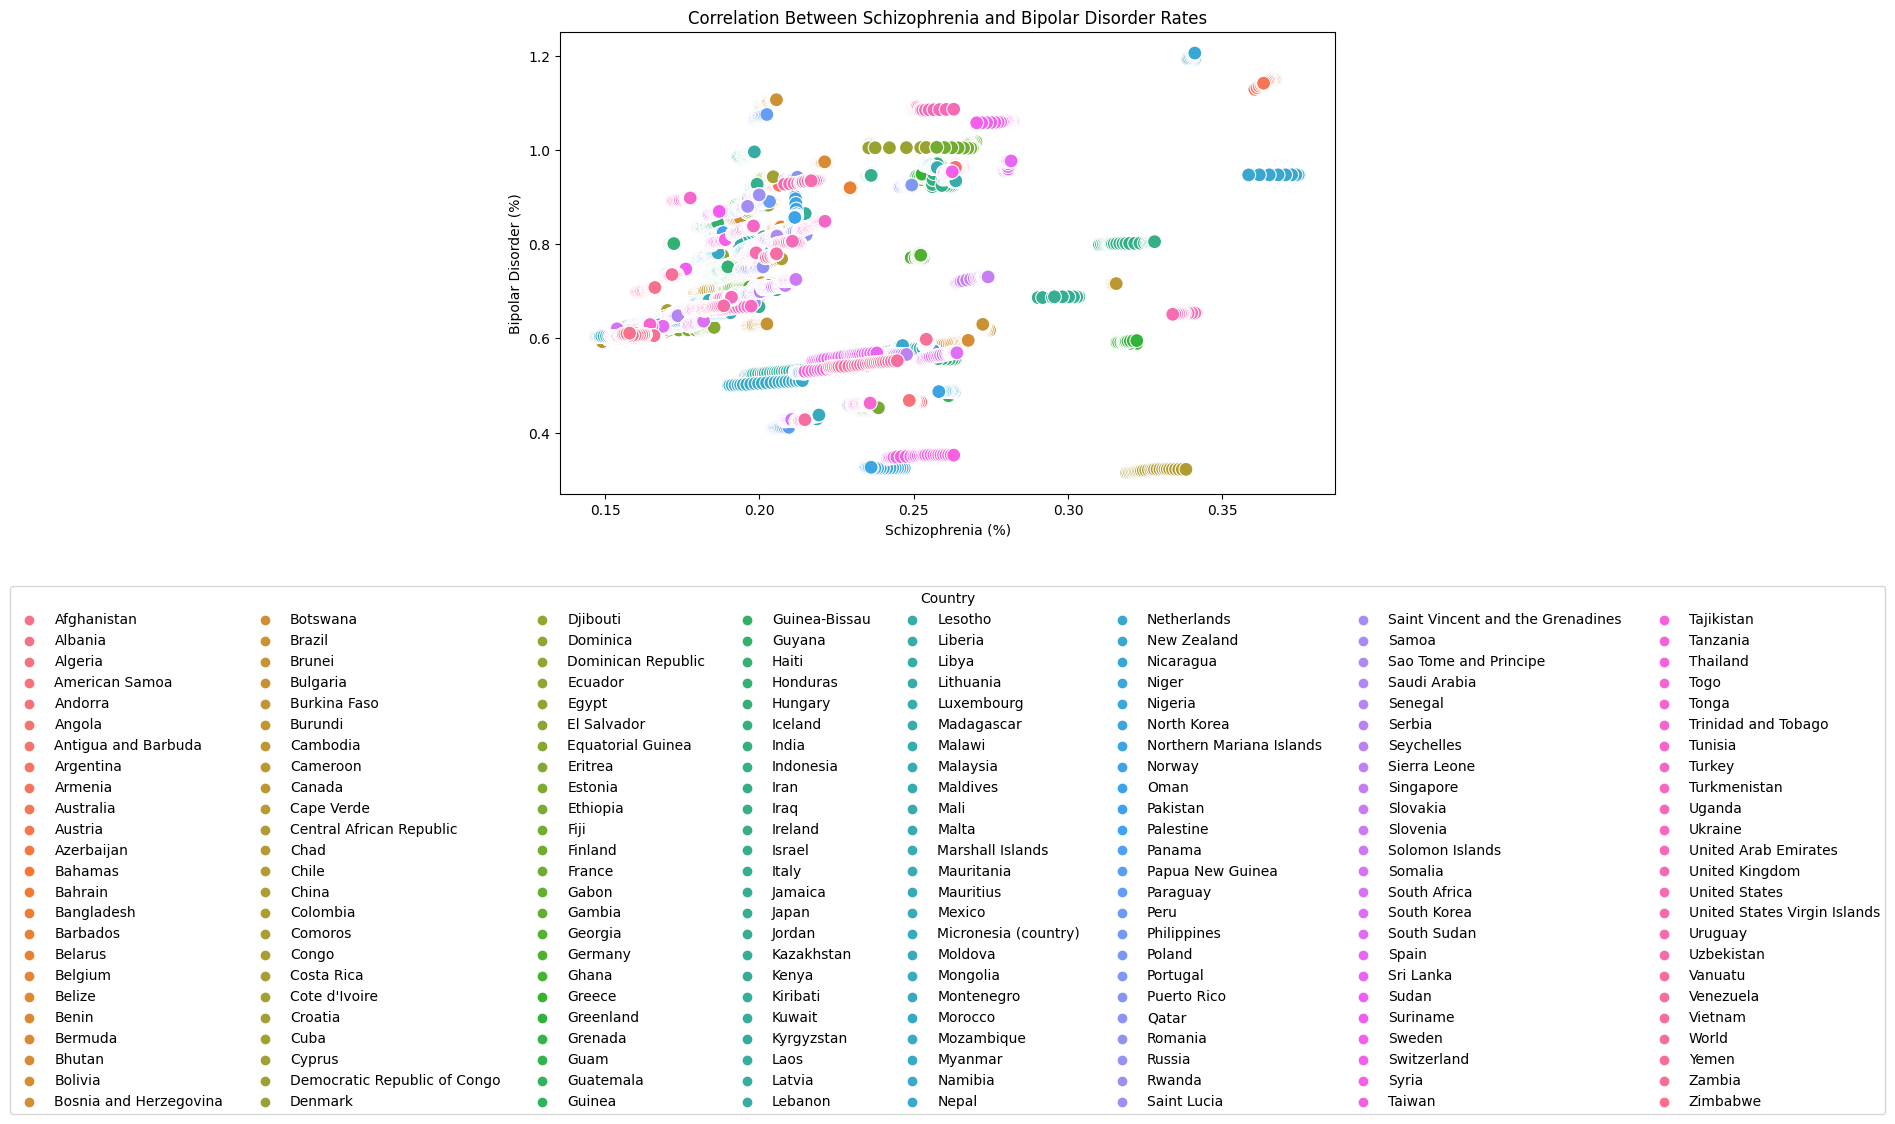

Correlation Coefficient: 0.23152191274578768


In [34]:
# Extract relevant columns for schizophrenia and bipolar disorder
schizophrenia_bipolar_data = Unique_Dataset[['Entity', 'Schizophrenia (%)', 'Bipolar disorder (%)']]

# Drop rows with missing values in either column
schizophrenia_bipolar_data = schizophrenia_bipolar_data.dropna(subset=['Schizophrenia (%)', 'Bipolar disorder (%)'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the correlation
scatter_plot = sns.scatterplot(data=schizophrenia_bipolar_data, x='Schizophrenia (%)', y='Bipolar disorder (%)', hue='Entity', s=100)

# Set labels and title
plt.xlabel('Schizophrenia (%)')
plt.ylabel('Bipolar Disorder (%)')
plt.title('Correlation Between Schizophrenia and Bipolar Disorder Rates')

# Adjust legend placement and orientation
scatter_plot.legend(title='Country', bbox_to_anchor=(0.5, -0.2), loc='upper center', borderaxespad=0., ncol=8)

# Show the plot
plt.show()

# Calculate and print the correlation coefficient
correlation_coefficient = schizophrenia_bipolar_data['Schizophrenia (%)'].corr(schizophrenia_bipolar_data['Bipolar disorder (%)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

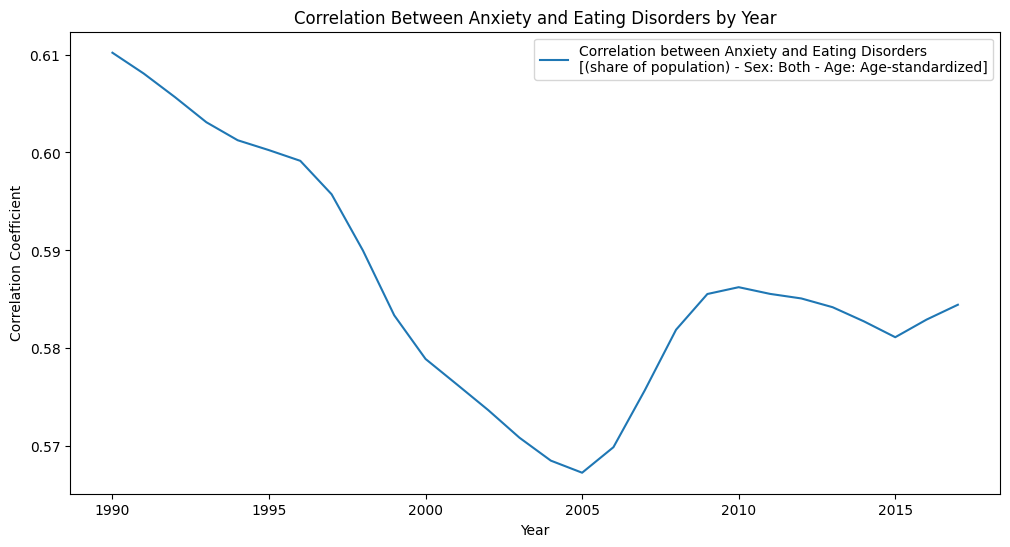

In [29]:
# Extract relevant columns for anxiety and eating disorders
anxiety_eating_data = Unique_Dataset[['Year', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Drop rows with missing values in either column
anxiety_eating_data = anxiety_eating_data.dropna()

# Group by year and calculate the correlation coefficient for each year
correlation_by_year = anxiety_eating_data.groupby('Year').corr().iloc[0::2, -1].reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a line plot to visualize the correlation by year
sns.lineplot(data=correlation_by_year, x='Year', y='Eating disorders (share of population) - Sex: Both - Age: Age-standardized', label='Correlation between Anxiety and Eating Disorders\n[(share of population) - Sex: Both - Age: Age-standardized]')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Anxiety and Eating Disorders by Year')

# Show the legend
plt.legend()

# Show the plot
plt.show()


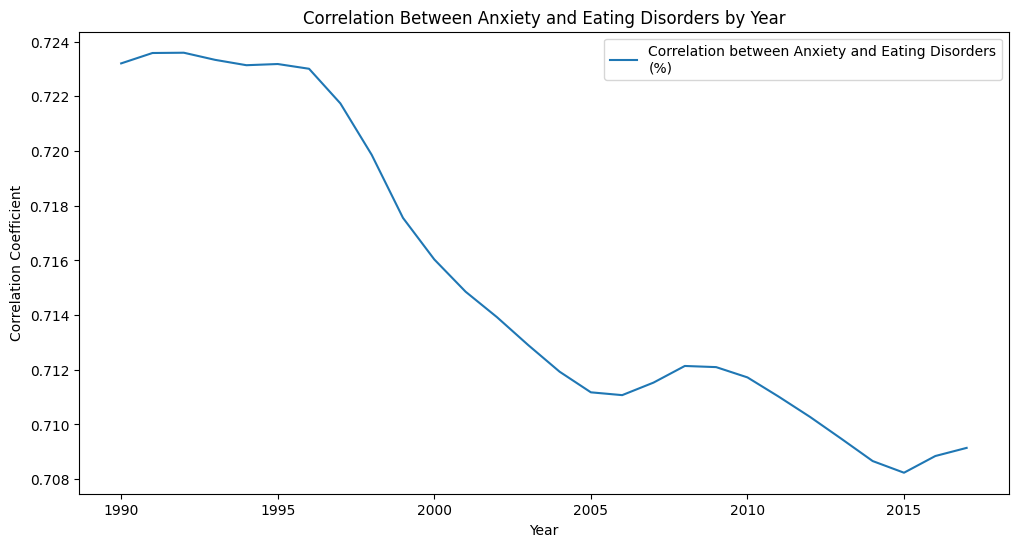

In [30]:
# Extract relevant columns for anxiety and eating disorders
anxiety_eating_data = Unique_Dataset[['Year', 'Anxiety disorders (%)', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Drop rows with missing values in either column
anxiety_eating_data = anxiety_eating_data.dropna()

# Group by year and calculate the correlation coefficient for each year
correlation_by_year = anxiety_eating_data.groupby('Year').corr().iloc[0::2, -1].reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a line plot to visualize the correlation by year
sns.lineplot(data=correlation_by_year, x='Year', y='Eating disorders (share of population) - Sex: Both - Age: Age-standardized', label='Correlation between Anxiety and Eating Disorders\n(%)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Anxiety and Eating Disorders by Year')

# Show the legend
plt.legend()

# Show the plot
plt.show()


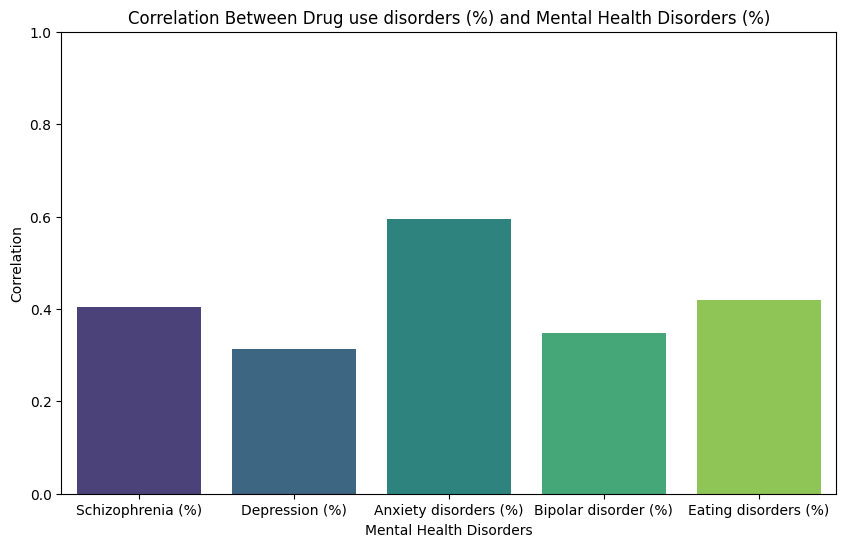

In [31]:
# Select relevant columns with (%)
selected_columns = [
    'Schizophrenia (%)',
    'Depression (%)',
    'Anxiety disorders (%)',
    'Bipolar disorder (%)',
    'Eating disorders (%)',
    'Drug use disorders (%)'
]

# Calculate correlations with Drug use disorders (%)
correlations = Unique_Dataset[selected_columns].corr()['Drug use disorders (%)']

# Remove the correlation with itself
correlations = correlations.drop('Drug use disorders (%)')

# Create a bar chart for correlations with bars starting at the x-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis', bottom=0)
plt.title('Correlation Between Drug use disorders (%) and Mental Health Disorders (%)')
plt.xlabel('Mental Health Disorders')
plt.ylabel('Correlation')
plt.ylim(0, 1)  # Set y-axis limits for positive correlation values (0 to 1)

# Display the plot
plt.show()
